# Abalone Case Study
#### Problem Statement
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.
#### Attribute Information
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

##### Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 


You have to predict the rings of each abalone which will lead us to the age of that abalone

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import joblib
%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv('abalone.csv')

# Let's check first 5 rows
df.head()

,Sex,Length,diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Let's check the features informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sex      4177 non-null   object 
 1   Length   4177 non-null   float64
 2   diam     4177 non-null   float64
 3   Height   4177 non-null   float64
 4   Whole    4177 non-null   float64
 5   Shucked  4177 non-null   float64
 6   Viscera  4177 non-null   float64
 7   Shell    4177 non-null   float64
 8   Rings    4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


So our dataset contains `4177 rows` and `9 columns` out of which there is `0 null` values and -
* float - 7
* object - 1
* integer - 1

In [4]:
# Let's confirm null values
df.isnull().sum()

Sex        0
Length     0
diam       0
Height     0
Whole      0
Shucked    0
Viscera    0
Shell      0
Rings      0
dtype: int64

As we have confirmed that there are no null values in our dataset.

In [5]:
# Now let's check feature description
df.describe()

,Length,diam,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As we can see that in each feature there is some difference in mean and median,it shows outliers pressence.Our target variable also contains higher standard deviation than others in the dataset,even there is a huge difference in the 75th percentile and 100th percentile in target variable.

## Exploratory Data Analysis

#### Univariate Analysis
In univariate analysis we are going to check the nature of data pressence in each variable respectively.

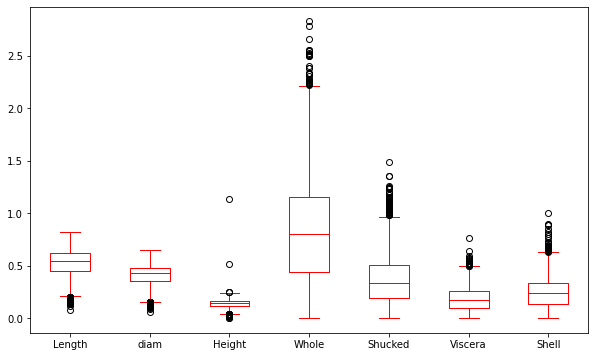

In [6]:
df.iloc[:,0:8].plot(kind='box',figsize=(10,6),color='red')

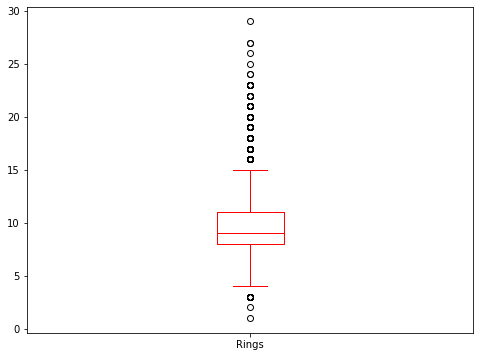

In [7]:
df.iloc[:,-1].plot(kind='box',figsize=(8,6),color='red')

So from the above graphs,we can see that both explanatory and dependent variables contains outliers.

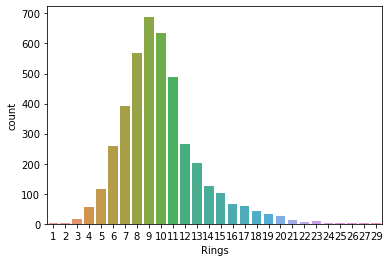

In [8]:
# Let's chcek the data distribution in dependent variable.
sns.countplot(df['Rings'])

Here we can see that most of the data is in range of 5-15 rings. 

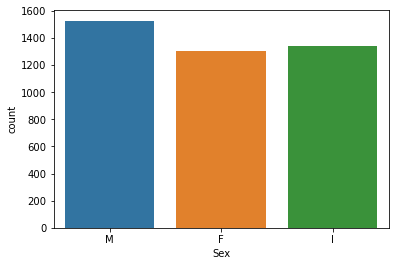

In [9]:
sns.countplot(df['Sex'])

Variabale `Sex` contains 3 classes
* M --> Male
* F --> Female
* I --> Infant


#### Bivariate Analysis

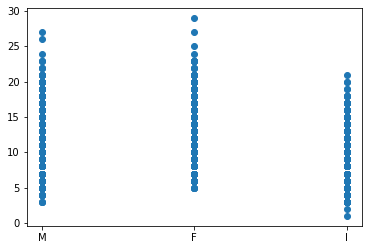

In [10]:
plt.scatter(x='Sex',y='Rings',data=df)

From the graph we can say that infants have less rings and` females have higher rings` in their initial age as compared to males and infants and also females have more rings than males in their old age which means that females have higher lifespan than males.

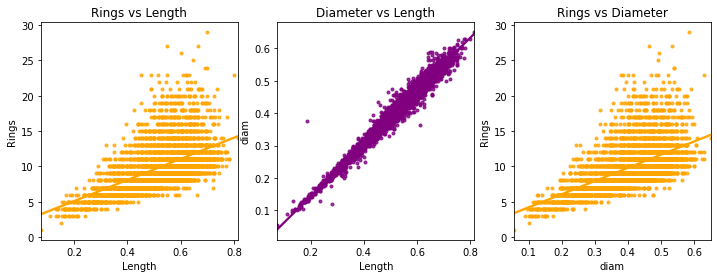

In [11]:
fig,axes=plt.subplots(1,3 ,figsize=(12,4))
sns.regplot(ax=axes[0],x='Length',y='Rings',data=df,color='orange',marker=".")
axes[0].set_title("Rings vs Length")

sns.regplot(ax=axes[1],x='Length',y='diam',data=df,color='purple',marker=".")
axes[1].set_title("Diameter vs Length")

sns.regplot(ax=axes[2],x='diam',y='Rings',data=df,color='orange',marker=".")
axes[2].set_title('Rings vs Diameter')

plt.show()

 in 1st  graph, we can see that the length and rings are having a positive linear relationship.The increase in length of shell is accompained with increase in rings number or vice-versa.There are some outliers also present in length with respect to the rings in plant.

But from the 2nd other graph we can also convey that both length and diameter of shell are highly correlated to each other as the lenght of shell increases its diameter also increases.

So in 3rd graph ,it is clear from our observations that the nature of diameter is same as the nature of length with rings of a plant.

As we can see that the length and rings are have a positive linear relationship.The increase in length of shell is accompained with increase in rings number or vice-versa.There are some outliers also present in length with respect to the rings in plant.

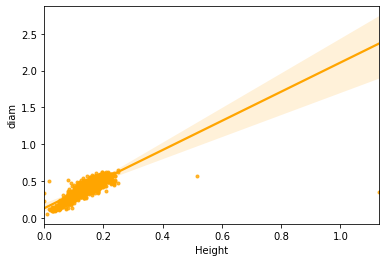

In [12]:
sns.regplot(x='Height',y='diam',data=df,color='orange',marker=".")

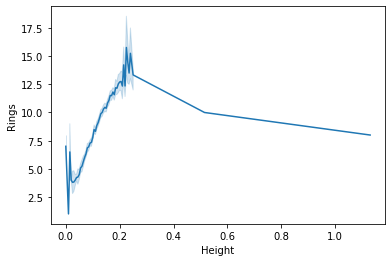

In [13]:
sns.lineplot(x='Height',y='Rings',data=df)

Lineplot describes the clear relationship between rings and height of abalone.It states that as the height increase,there is a sharp increase in the height of abalone upto 0.28(mm) but after that further increase in height causes rings to decrease.

But as we see in above graph it conatins some outliers thats why it not giving accurate result.


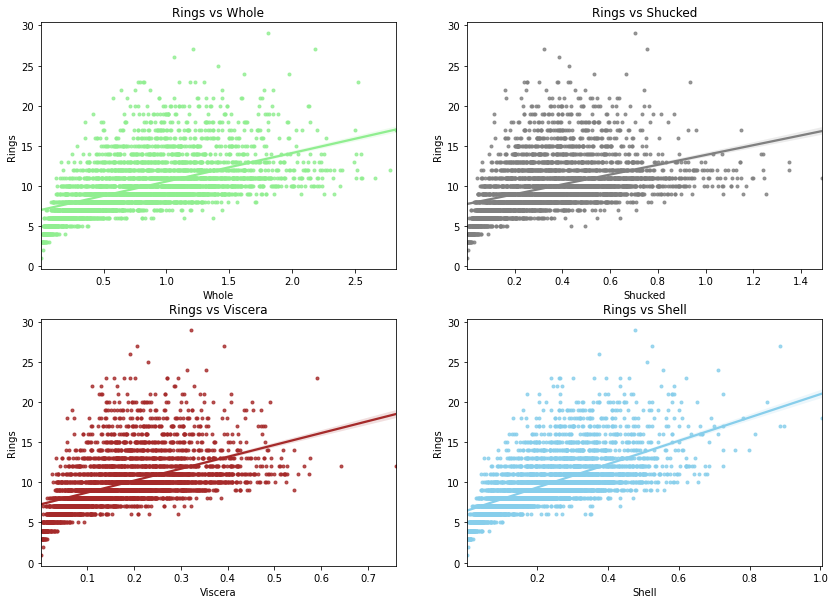

<Figure size 432x288 with 0 Axes>

In [14]:
fig,axes=plt.subplots(2,2 ,figsize=(14,10))
sns.regplot(ax=axes[0,0],x='Whole',y='Rings',data=df,color='lightgreen',marker=".")
axes[0,0].set_title("Rings vs Whole")

sns.regplot(ax=axes[0,1],x='Shucked',y='Rings',data=df,color='grey',marker=".")
axes[0,1].set_title("Rings vs Shucked")

sns.regplot(ax=axes[1,0],x='Viscera',y='Rings',data=df,color='brown',marker=".")
axes[1,0].set_title('Rings vs Viscera')

sns.regplot(ax=axes[1,1],x='Shell',y='Rings',data=df,color='skyblue',marker=".")
axes[1,1].set_title('Rings vs Shell')

plt.show()
plt.tight_layout()

All the 4 graphs above show same type of relationship with the rings.The whole feature contains the whole weight of abalone,while the shucked feature contains the meat weight,Viscera contains the gut weight which remains after bleeding,and the Shell contains the dreid weight of abalaone.So these graphs shows that all the contents of these features are correlated to each other.

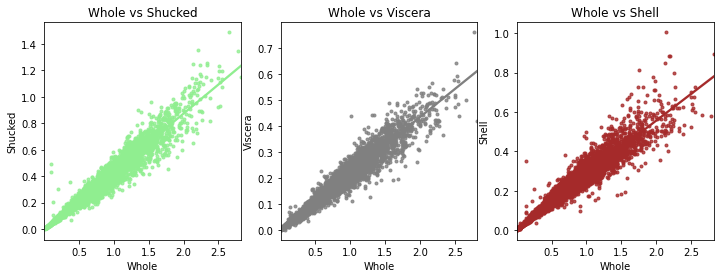

<Figure size 432x288 with 0 Axes>

In [15]:
fig,axes=plt.subplots(1,3 ,figsize=(12,4))
sns.regplot(ax=axes[0],x='Whole',y='Shucked',data=df,color='lightgreen',marker=".")
axes[0].set_title("Whole vs Shucked")

sns.regplot(ax=axes[1],x='Whole',y='Viscera',data=df,color='grey',marker=".")
axes[1].set_title("Whole vs Viscera")

sns.regplot(ax=axes[2],x='Whole',y='Shell',data=df,color='brown',marker=".")
axes[2].set_title('Whole vs Shell')

plt.show()
plt.tight_layout()

All the four columns are correlated to each other so they all give same result with rings in abalone.

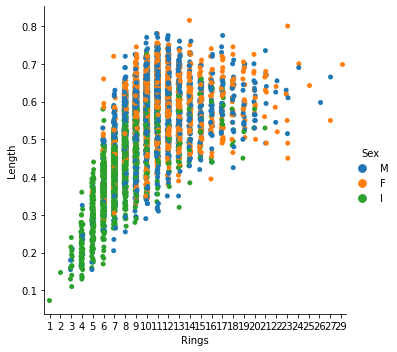

In [16]:
sns.catplot(x='Rings',y='Length',hue='Sex',data=df)

Here we can see the relationsip between rings,length and sex of abalone. Infants are on the lowest length with respect to rings of abalone,and females are on the longest length.`

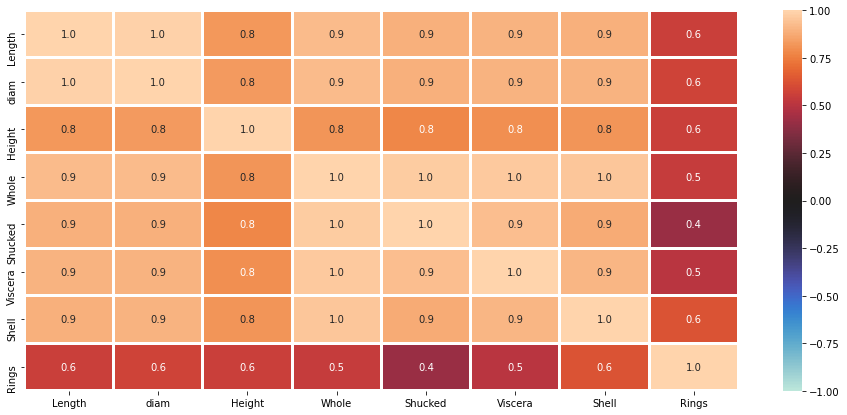

In [17]:
corr =df.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr ,annot=True,vmin=-1,vmax=1,center=0,linewidths=2,fmt=".1f")

Here we can see that whole data is positively correlated with the dependent variable.Which means any positive change in any variable will cause a positive change in th dependent variable.Here we can aslo see that all variables are linearly related with each other at a high degree of correlation,which means that any change in a variable will cause a change in others variables.This will create a problem of `Multicolinearity`.

In this case,all variables are important for us otherwise an elimination of any variabel will change our accuracy of prediction.

### Data Cleaning

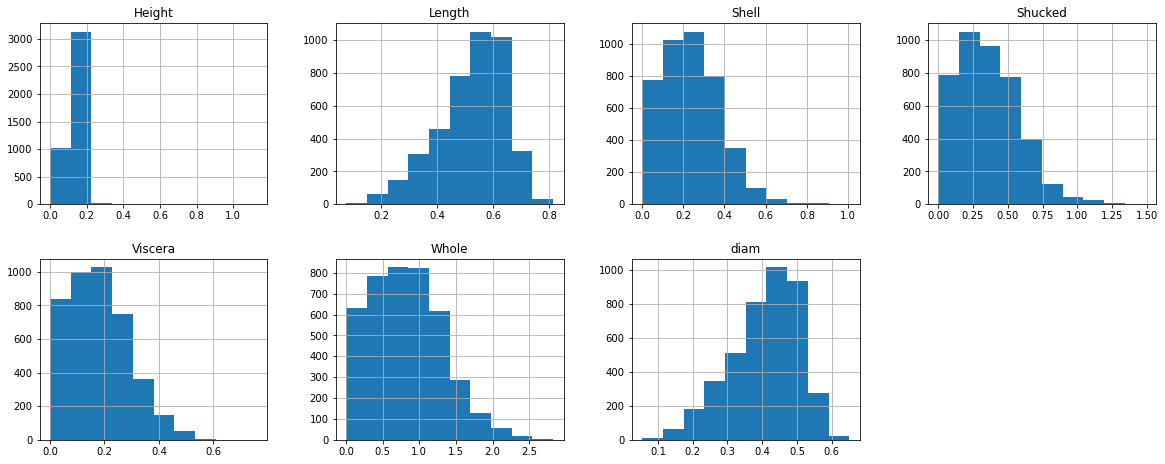

In [18]:
df.iloc[:,1:8].hist(layout=(3,4),figsize=(20,12),bins=10,grid=True)
plt.show()

Some skewness is present in our dataset like in `Height`.Let's check the values of skewness.

In [19]:
df.iloc[:,1:8].skew()

Length    -0.639873
diam      -0.609198
Height     3.128817
Whole      0.530959
Shucked    0.719098
Viscera    0.591852
Shell      0.620927
dtype: float64

Here we are not going to remove skewness from our dataset because in the model we are using conatins inbuilt skewness treatment.Treating skewness outside model is not giving as accuarate results.

In [20]:
df.groupby('Sex')['Length', 'diam', 'Height', 'Whole', 'Shucked', 'Viscera',
       'Shell', 'Rings'].mean()

,Length,diam,Height,Whole,Shucked,Viscera,Shell,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [21]:
from sklearn.preprocessing import OrdinalEncoder
encod=OrdinalEncoder()
df[['Sex']]=encod.fit_transform(df[['Sex']])

In [22]:
df =df.copy()

In [23]:
df.head()

,Sex,Length,diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Separate independent and dependent variables

In [24]:
x=df.drop(['Rings','Sex'],axis=1)
y=df['Rings']

In [25]:
x.features=x

In [26]:
print("Shape of independent variables",x.shape)
print("Shape of dependent variables",y.shape)

Shape of independent variables (4177, 7)
Shape of dependent variables (4177,)


### Data for training and testing 

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.25, random_state=152)

dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
accuracy_score(y_test,dtc_pred)

0.20287081339712917

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.25, random_state=152)

rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
accuracy_score(y_test,rfc_pred)

0.24114832535885167

In [29]:
from sklearn.svm import SVC

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
svc=SVC(kernel='linear', C=1, gamma=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Trained accuracy :",accuracy_score(y_train,svc.predict(x_train)))
print("Training accuracy :",accuracy_score(y_test,pred))


Trained accuracy : 0.25089349535382416
Training accuracy : 0.2610587382160986


Here we are using `Support Vector Classifier` for our model building,because in soo much classes svm works better than other algorithms.

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
svc=SVC(kernel='rbf', C=1, gamma=100)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Trained accuracy :",accuracy_score(y_train,svc.predict(x_train)))
print("Training accuracy :",accuracy_score(y_test,pred))


Trained accuracy : 0.39742673338098644
Training accuracy : 0.27411167512690354


As the model accuracy is not increasing we need to do some feature engineering on the target column.So that we can get better accuarcy result

###  Feature Engineering


In [32]:
df['class1'] =np.where(df['Rings']>=21,8,0)
df['class2'] =np.where((df['Rings']>=17) &(df['Rings']<21),7,0)
df['class3'] =np.where((df['Rings']>=14) &(df['Rings']<17),6,0)
df['class4'] =np.where((df['Rings']>=12) &(df['Rings']<14),5,0)
df['class5'] =np.where((df['Rings']>=10) &(df['Rings']<12),4,0)
df['class6'] =np.where((df['Rings']>=9) &(df['Rings']<10),3,0)
df['class7'] =np.where((df['Rings']>=7) &(df['Rings']<9),2,0)
df['class8'] =np.where((df['Rings']>=5) &(df['Rings']<7),1,0)

In [33]:
df['rings']=df['class1']+df['class2']+df['class3']+df['class4']+df['class5']+df['class6']+df['class7']+df['class8']

In [34]:
df['rings'].sort_values().value_counts()

4    1121
2     959
3     689
5     470
1     374
6     296
7     158
0      74
8      36
Name: rings, dtype: int64

In [35]:
df.columns

Index(['Sex', 'Length', 'diam', 'Height', 'Whole', 'Shucked', 'Viscera',
       'Shell', 'Rings', 'class1', 'class2', 'class3', 'class4', 'class5',
       'class6', 'class7', 'class8', 'rings'],
      dtype='object')

In [36]:
x=df.drop(['Rings', 'class1', 'class2', 'class3', 'class4','class5',
       'class6', 'class7', 'class8'],axis=1)
y=df['rings']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [38]:
svc = SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svc.fit(x_train, y_train)
'''Predicting for Training Set'''
y_pred = svc.predict(x_test)
'''Accuracy Score'''
result_acc = accuracy_score(y_test,y_pred) 

In [39]:
result_acc

0.9608411892675852

Due to feature enginerring there is a significant increase in accuracy score of our model.

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
for i in range(2,10):
    score =cross_val_score(svc,x,y,cv=i)
    
    print("cross mean score for ",i," is ",score.mean())

cross mean score for  2  is  0.9511615761450694
cross mean score for  3  is  0.9595394184936725
cross mean score for  4  is  0.9597795101651725
cross mean score for  5  is  0.9614551757728563
cross mean score for  6  is  0.9624131472044942
cross mean score for  7  is  0.9633739165626791
cross mean score for  8  is  0.9638492377456906
cross mean score for  9  is  0.9636102871503316


In [42]:
print("Training accuracy :",accuracy_score(y_train,svc.predict(x_train)))

Training accuracy : 1.0


### Hyper-parameter tunning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid={"kernel":["linear",'rbf','sigmoid','poly'],
           "gamma":['scale','auto']}

gscv = GridSearchCV(estimator=svc,param_grid=param_grid,cv=8)
gscv.fit(x_train,y_train)
print(gscv.best_params_)

{'gamma': 'scale', 'kernel': 'linear'}


In [45]:
gscv_pred=gscv.best_estimator_.predict(x_test)

In [46]:
accuracy_score(y_test,gscv_pred)

1.0

In [47]:
svc = SVC(gamma= 'scale', kernel= 'linear')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_decision =svc.predict(x_test)

svc_a = accuracy_score(y_test,pred_decision)
print(svc_a)
svc_c = classification_report(y_test,pred_decision)
print(svc_c)

svc_score = cross_val_score(svc,x,y,cv=8)
svc =svc_score.mean()
print(svc)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       323
           3       1.00      1.00      1.00       229
           4       1.00      1.00      1.00       368
           5       1.00      1.00      1.00       149
           6       1.00      1.00      1.00        92
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        12

    accuracy                           1.00      1379
   macro avg       1.00      1.00      1.00      1379
weighted avg       1.00      1.00      1.00      1379

1.0


Here we can see that both of training and testing accuracy are same.So there is no overfitting or underfitting in our model.

### Saving the file

In [48]:
import joblib
joblib.dump(gscv.best_estimator_,"svc.obj")

['svc.obj']

## Conclusion

In [49]:
b=np.array(y_test)
a=np.array(y_pred)


In [50]:
df_com=pd.DataFrame({"original":b,"Predicted":a},index=range(len(a)))
df_com

,original,Predicted
0,3,3
1,2,2
2,6,6
3,3,3
4,6,6
...,...,...
1374,4,4
1375,2,2
1376,2,2
1377,1,1


We can see that almost exact result is coming.So our model is highly efficient in prediction.